In [1]:
# import required modules
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import Unity environment and turn off graphic during training
from unityagents import UnityEnvironment
env = UnityEnvironment(file_name="Reacher_Windows_x86_64/Reacher.exe", no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# initialize environment
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]

In [4]:
# get action size, state size and initial state for training
states = env_info.vector_observations
state_size = states.shape[1]
action_size = brain.vector_action_space_size

# initialize agent with action size and action size 
from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

In [5]:
def ddpg(n_episodes=1500, max_t=1000, print_every=20):

    # keep track of the last 100 scores
    scores_deque = deque(maxlen=100)
    scores = []
    
    for i_episode in range(1, n_episodes+1):
           
        # at the beginning of each episode, reset environment, state and score
        # set train mode to True during training
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        for t in range(max_t):
            
            # for each step:
            # 1) after observing a state at time t, agent takes action per current policy 
            # 2) after taking action at time t, agent oberves state and reward at t+1
            # 3) agent then adds the "SARS" tuple to memory 
            # 4) at every UPDATE_EVERY steps, agent then randomly select a batch of memory to update 
            #    parameters of its value fuction and policy function by using by DDPG 
            
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
           
            state = next_state
            score += reward
            
            if done:
                break 
                
        scores_deque.append(score)
        scores.append(score)
                
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
            
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        # save weights of parameters when average reward (over 100 episodes) reaches at least 30
        if np.mean(scores_deque) >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
               
    return scores

c:\users\david\appdata\local\continuum\anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\david\Documents\GitHub\deep-reinforcement-learning\p2_continuous-control\ddpg_agent.py:111: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 20	Average Score: 0.50
Episode 40	Average Score: 0.57
Episode 60	Average Score: 0.56
Episode 80	Average Score: 0.58
Episode 100	Average Score: 0.72
Episode 120	Average Score: 0.78
Episode 140	Average Score: 0.88
Episode 160	Average Score: 1.06
Episode 180	Average Score: 1.39
Episode 200	Average Score: 1.52
Episode 220	Average Score: 1.82
Episode 240	Average Score: 2.10
Episode 260	Average Score: 2.46
Episode 280	Average Score: 2.67
Episode 300	Average Score: 3.22
Episode 320	Average Score: 3.67
Episode 340	Average Score: 4.21
Episode 360	Average Score: 4.55
Episode 380	Average Score: 5.09
Episode 400	Average Score: 5.29
Episode 420	Average Score: 6.01
Episode 440	Average Score: 6.55
Episode 460	Average Score: 7.15
Episode 480	Average Score: 7.66
Episode 500	Average Score: 8.12
Episode 520	Average Score: 8.20
Episode 540	Average Score: 8.50
Episode 560	Average Score: 8.94
Episode 580	Average Score: 9.25
Episode 600	Average Score: 9.53
Episode 620	Average Score: 9.71
Episode 640	

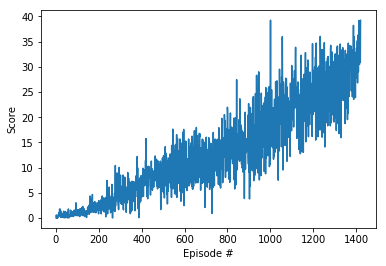

In [6]:
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()